##### Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

Submit your work below, and plan on discussing with your mentor. You can also take a look at these example solutions.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperformance_df = pd.read_sql_query('select * from studentsperformance',con=engine)


engine.dispose()


In [3]:
studentsperformance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
studentsperformance_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### question 1
Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

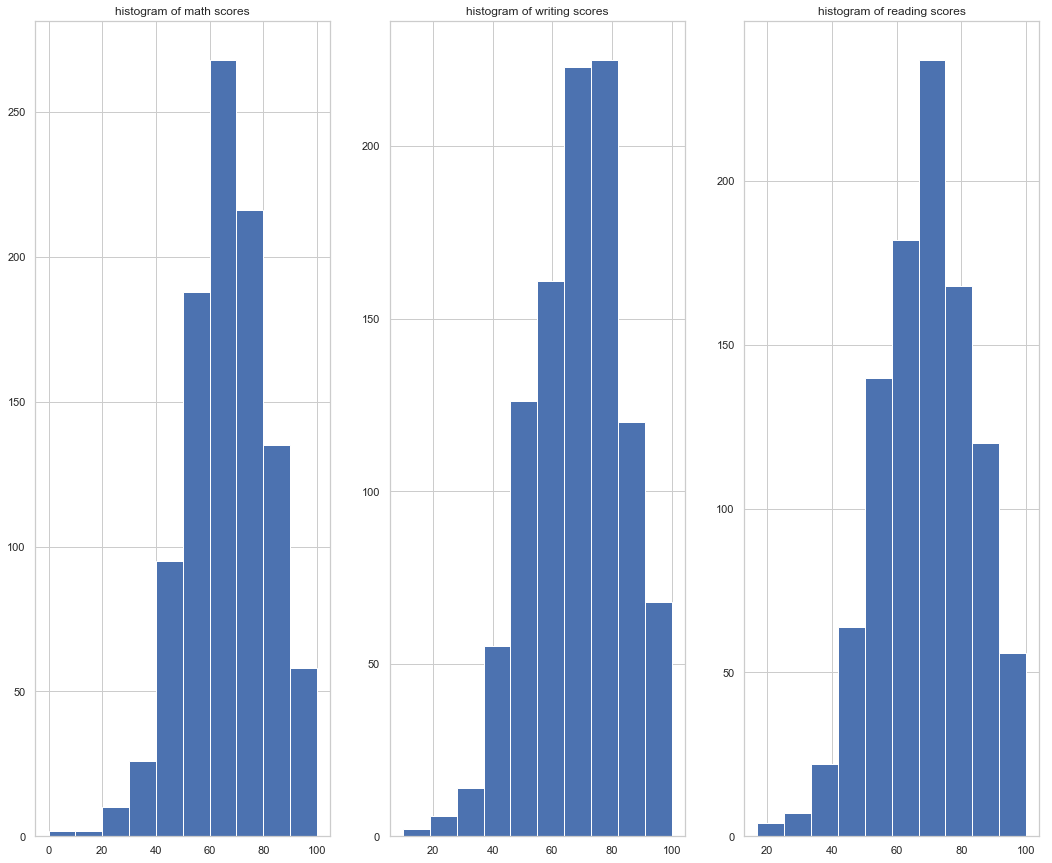

In [6]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(1, 3, 1)
plt.hist(studentsperformance_df['math score'])
plt.title('histogram of math scores')

plt.subplot(1, 3, 2)
plt.hist(studentsperformance_df['writing score'])
plt.title('histogram of writing scores')

plt.subplot(1, 3, 3)
plt.hist(studentsperformance_df['reading score'])
plt.title('histogram of reading scores')

plt.show()

In [7]:
jb_stats = jarque_bera(np.sqrt(studentsperformance_df['math score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['math score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(studentsperformance_df['writing score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['writing score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(studentsperformance_df['reading score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['reading score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16


p-value of 0.0 indicates data are not normally distributed

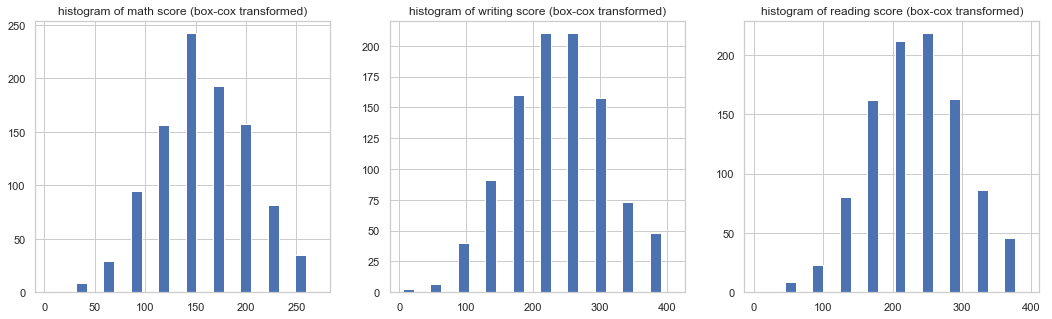

In [11]:
from scipy.stats import boxcox
#error due to data that was not positive, cannot run boxcox, excluding math score of 0
math_scores_boxcox = boxcox(studentsperformance_df[studentsperformance_df['math score'] > 0]['math score'])
writing_scores_boxcox = boxcox(studentsperformance_df['writing score'])
reading_scores_boxcox = boxcox(studentsperformance_df['reading score'])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_scores_boxcox)
plt.title('histogram of math score (box-cox transformed)')

plt.subplot(1, 3, 2)
plt.hist(writing_scores_boxcox)
plt.title('histogram of writing score (box-cox transformed)')

plt.subplot(1, 3, 3)
plt.hist(reading_scores_boxcox)
plt.title('histogram of reading score (box-cox transformed)')

plt.show()

In [12]:
jb_stats = jarque_bera(math_scores_boxcox)
norm_stats = normaltest(math_scores_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_scores_boxcox)
norm_stats = normaltest(writing_scores_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_scores_boxcox)
norm_stats = normaltest(reading_scores_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

ValueError: operands could not be broadcast together with shapes (2,) (999,) 

In [ ]:
# there is an observation with math score is equal to 0
# since box-cox transformation only works with positive data
# we are excluding it.
math_boxcox,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(education_df["reading score"])
writing_boxcox,_ = boxcox(education_df["writing score"])

plt.figure(figsize=(18,10))

##### question2
Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

##### question 3
Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?